<a href="https://colab.research.google.com/github/Educat8n/AI-Development-Oxford/blob/main/boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%writefile boston_house_price_prediction.py


# Step -1 - Import Packages
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics
plt.rcParams["figure.figsize"] = (10, 10)



# Step - 2 - Define the main function
def main():
    # Get data

    ### To Do Assignment: try changing the data from Boston housing to California housing dataset 
    ### You can load the datasets as follows::
    ###    from sklearn.datasets import fetch_california_housing
    ###    housing = fetch_california_housing()
    ###  Refer this link for more detatils: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
    boston = load_boston()
    boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)
    boston_y = boston.target
    features = boston.feature_names
    
    ## Data Exploration
    print(f'The features in dataset are: {features}')
    #print(f'Data description\n {boston_X.describe()}')
    
    #Plots
    plot_data(boston_X, boston_y, features, cor=True)

    ## Remove Outliers
    boston_X, boston_y = remove_outliers(boston_X,boston_y, features)
    
    X_train, y_train, X_test, y_test = preprocess(boston_X, boston_y, features)

    model = SVR() 

    model = train(model, X_train, y_train)

    evaluate(model, X_test, y_test, bl= True)

    best_params = optimize_models(X_train, y_train)
    print(best_params)

    ## Build Best Model
    best_C= best_params['C']
    best_kernel = best_params['kernel']

    best_model = SVR(kernel = best_kernel, C= best_C)
    best_model = train(best_model, X_train, y_train)
    evaluate (best_model, X_test, y_test)


    

 
# Step - 3 - Plot graphs to understand data
def plot_data(x_df, y_df,features, cor=False):
    X = x_df.values
    plt.figure(figsize=(10,10))
    plt.title("Price Distribution")
    plt.hist(y_df, bins=30)
    plt.show()
    #cols = x_df.columns()
    fig, ax = plt.subplots(1, len(features), sharey=True, figsize=(20,5))
    plt.title("Relationship between different input features and price")
    ax = ax.flatten()
    for i, col in enumerate(features):
        x = X[:,i]
        y = y_df
        ax[i].scatter(x, y, marker='o')
        ax[i].set_title(col)
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('MEDV')
    plt.show()

    if cor:
      pass
      ### To Do Add the code to find and display correlation among
      ### different features




# Step - 4 - Preprocess data
# Step -4a : Remove outliers
def remove_outliers(x,y, features):
    #remove null
    x_df = x.copy(deep=True)
    x_df['MEDV'] = y
    x_df.dropna(inplace=True)
    return x_df[features], x_df['MEDV']
    
    
# Step -4b : Normalize data
def scale_numeric(df):
    x = df.values 
    scaler = preprocessing.StandardScaler()
    ### To Do Assignment instead of StandardScaler use MinMaxscaler, 
    ### Also observe if scaling influences the results
    x_scaled = scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

    

# Step -4b : Preprocess data
def preprocess(x, y, features):
    x_df = x[features].copy(deep=True)
    x_df = scale_numeric(x_df)
    #print(len(x_df),len(y))
    # Split data into train, test
    X_train, X_test, y_train, y_test = train_test_split(x_df,y, test_size=0.3, random_state=1)
    return X_train, y_train, X_test, y_test
    
    
    
    
# Step - 5 - train model 
def train(model,X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
    
# Step - 6 - Evaluate Model
def evaluate(model, X_test, y_test, plot = True, print_results=True, bl=False):
    y_pred = model.predict(X_test)
    if print_results:
      if bl:
        print('\n\nBaseline Model Performance on Test Dataset:\n')
      else:
        print('\n\nBest Model Performance on Test Dataset:\n')
      print('R^2:',metrics.r2_score(y_test, y_pred))
      print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
      print('MSE:',metrics.mean_squared_error(y_test, y_pred))
      print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    if plot:
      plt.scatter(y_test, y_pred)
      plt.xlabel("Prices")
      plt.ylabel("Predicted prices")
      plt.title("Prices vs Predicted prices")
      plt.show()
    return 
    
    
    
    
# Step - 7 - Improve Model
def optimize_models(X_train, y_train):
  ### To Do Assignment Change the model to MLP  and accordiongly change Grid search params
  params = {'kernel':['linear', 'rbf'], 'C':[1, 10]}
  model = SVR()
  clf = GridSearchCV(model, params)
  clf.fit(X_train, y_train)
  return (clf.best_params_)



# call the main finction
if __name__ == '__main__':
    main()
    
    
    

Overwriting boston_house_price_prediction.py


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

The features in dataset are: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


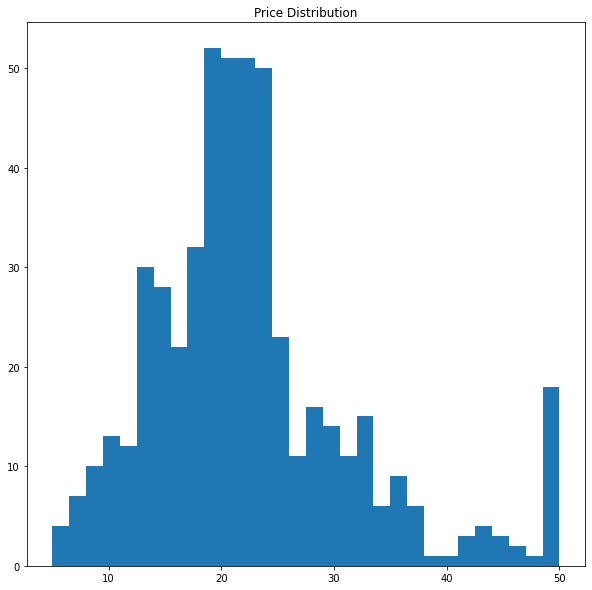

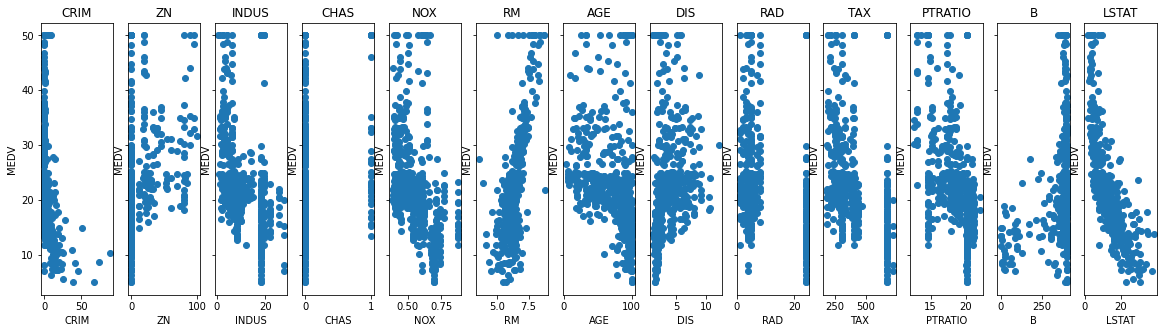

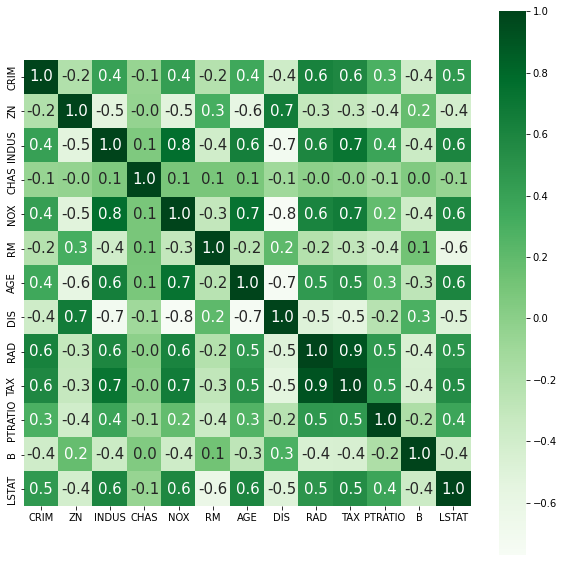



Baseline Model Performance on Test Dataset:

R^2: 0.66429170765539
MAE: 3.396550826062456
MSE: 30.76917135066654
RMSE: 5.546996606332704


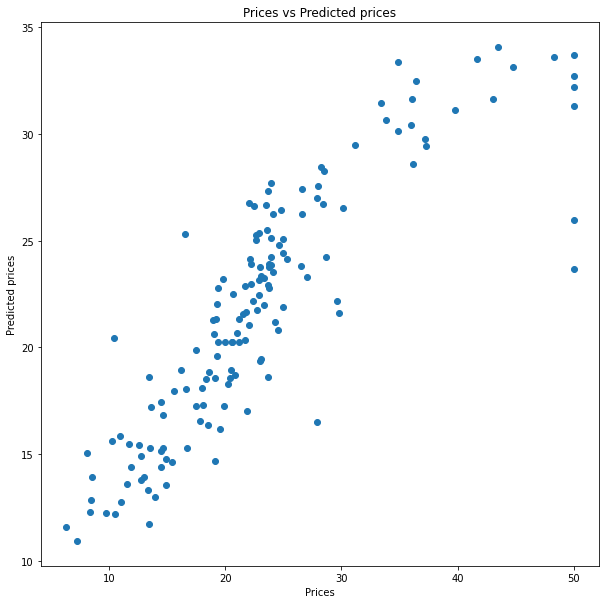

{'C': 10, 'kernel': 'rbf'}


Best Model Performance on Test Dataset:

R^2: 0.8783322112535658
MAE: 2.21901579702242
MSE: 11.151398774364656
RMSE: 3.3393710147817743


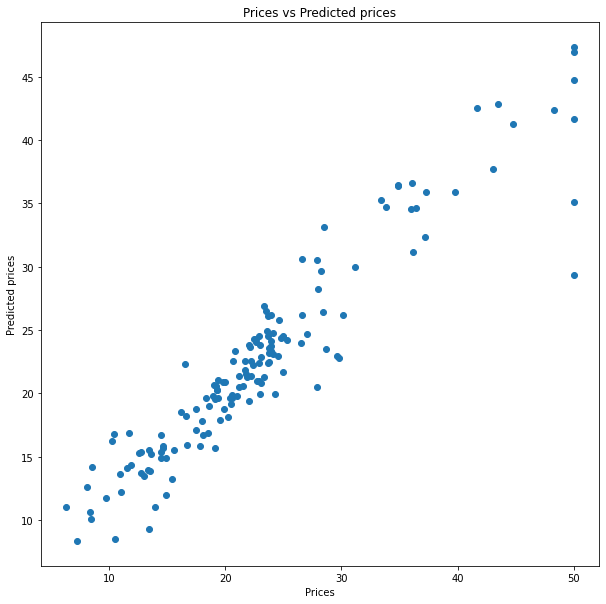

In [ ]:
%run boston_house_price_prediction.py

In [ ]:
%%writefile cancer_detection.py


# Step -1 - Import Package
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics
plt.rcParams["figure.figsize"] = (10, 10)



# Step - 2 - Define the main function
def main():
    # Get data
    cancer_data = load_breast_cancer()
    cancer_data_X = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
    cancer_data_y = cancer_data.target
    features = cancer_data.feature_names
    
    vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness']
    ## Data Exploration
    print(f'The features in dataset are: {features}')
    #print(f'Data description\n {cancer_data_X.describe()}')
    
    #Plots
    plot_data(cancer_data_X, cancer_data_y, features= vars, cor=True)

    ## Remove Outliers
    cancer_data_X, cancer_data_y = remove_outliers(cancer_data_X,cancer_data_y, features)
    
    X_train, y_train, X_test, y_test = preprocess(cancer_data_X, cancer_data_y, features)

    model = SVC(random_state=6)

    model = train(model, X_train, y_train)
    
    baseline = evaluate(model, X_test, y_test, bl=True)

    best_params = optimize_models(X_train, y_train)
    print(best_params)

    ## Build Best Model
    best_C= best_params['C']
    best_kernel = best_params['kernel']

    best_model = SVC(kernel = best_kernel, C= best_C, random_state=6)
    best_model = train(best_model, X_train, y_train)
    evaluate (best_model, X_test, y_test)
    

 
    
    
# Step - 3 - Plot graphs to understand data
def plot_data(x_df, y_df,features, cor=False):
    X = x_df.copy(deep=True)
    X['class'] = y_df
    sns.pairplot(X, hue = 'class', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )
    plt.show()
    
    if cor:
      corr = X[features].corr()
      plt.figure(figsize=(10,10))
      sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
      plt.show()






# Step - 4 - Preprocess data
# Step -4a : Remove outliers
def remove_outliers(x,y, features):
    #remove null
    x_df = x.copy(deep=True)
    x_df['class'] = y
    x_df.dropna(inplace=True)
    return x_df[features], x_df['class']
    
    
# Step -4b : Normalize data
def scale_numeric(df):
    x = df.values 
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

    

# Step -4b : Preprocess data
def preprocess(x, y, features):
    x_df = x[features].copy(deep=True)
    x_df = scale_numeric(x_df)
    #print(len(x_df),len(y))
    # Split data into train, test
    X_train, X_test, y_train, y_test = train_test_split(x_df,y, test_size=0.3, random_state=45)
    return X_train, y_train, X_test, y_test
    
    
    
    
# Step - 5 - train model 
def train(model,X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
    
# Step - 6 - Evaluate Model
def evaluate(model, X_test, y_test, plot = True, print_results=True, bl=False):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    if print_results:
      if bl:
        print('\n\nBaseline Model Performance on Test Dataset:\n')
      else:
        print('\n\nBest Model Performance on Test Dataset:\n')
      print('\nConfusion Matrix:\n',cm)
      print(f'Accuracy: {acc*100}%')

    if plot:
      sns.heatmap(cm, annot= True)
      plt.show()
    return 
    
    
    
    
# Step - 7 - Improve Model
def optimize_models(X_train, y_train):
  params = {'kernel':['rbf'], 'C':[1.0, 5.0, 10]}
  model = SVC(random_state=5)
  clf = GridSearchCV(model, params)
  clf.fit(X_train, y_train)
  return clf.best_params_


# call the main finction
if __name__ == '__main__':
    main()
    
    
    

Writing cancer_detection.py


The features in dataset are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


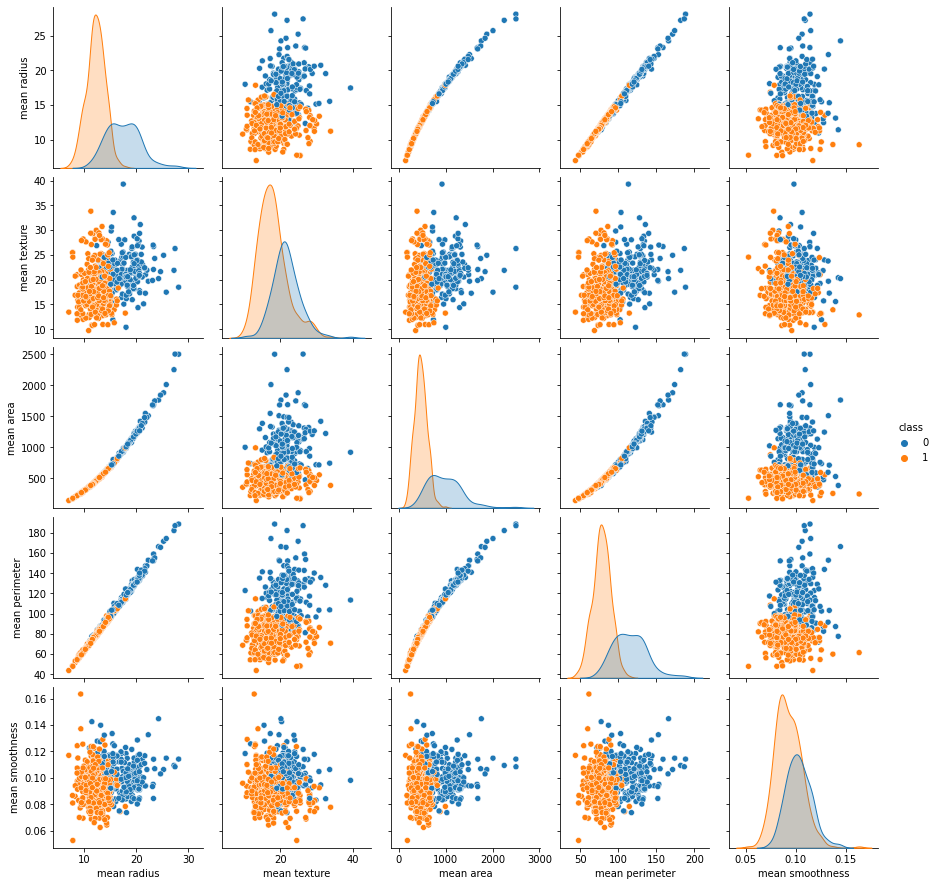

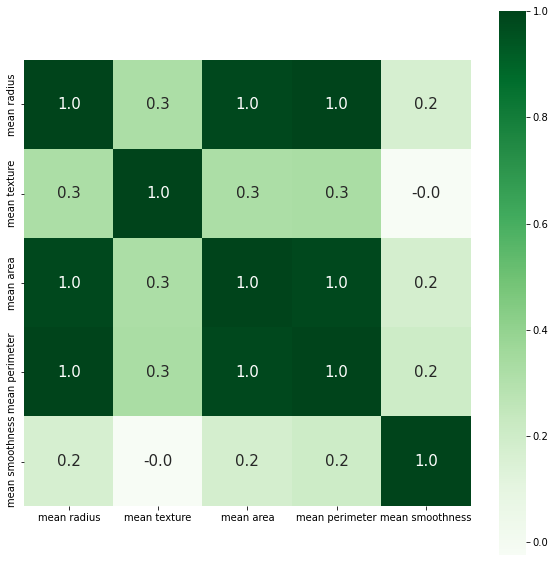



Baseline Model Performance on Test Dataset:


Confusion Matrix:
 [[ 57   4]
 [  1 109]]
Accuracy: 97.07602339181285%


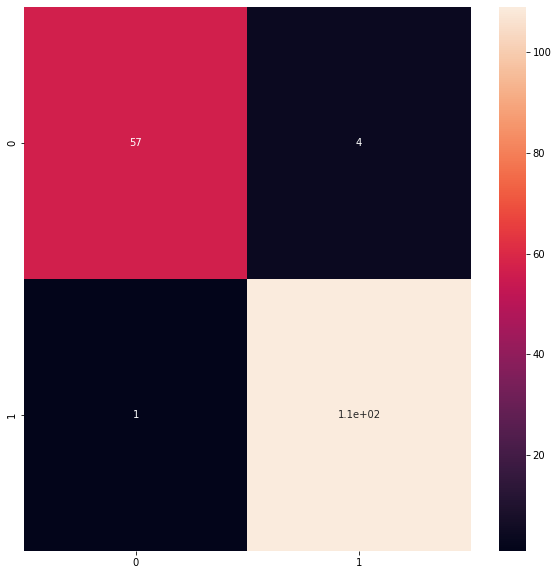

{'C': 5.0, 'kernel': 'rbf'}


Best Model Performance on Test Dataset:


Confusion Matrix:
 [[ 59   2]
 [  0 110]]
Accuracy: 98.83040935672514%


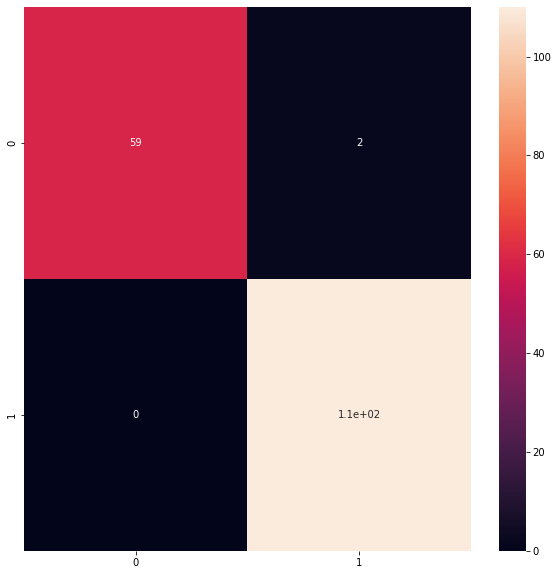

In [ ]:
%run cancer_detection.py